# COSC311 - Lab 2
### JJ McCauley

In [162]:
''' --- Imports --- '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Formatting graphs

## Task 1

In [163]:
b_df = pd.read_csv("Bejaia_Region.csv")  # Bejaia Region Dataset
print(b_df)
# Display the Bejaia Region Dataset Info & Statistics
print(b_df.info())
print(b_df.describe())
print("Unique Values of Wind Speed: ", b_df['Ws'].unique())
print("Sample Count: ", b_df['day'].count())

     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI      Classes  
0    0.5  not fire     
1  

In [164]:
s_df = pd.read_csv("Sidi-Bel_Abbes_Region.csv", on_bad_lines='skip')  # Sidi-Bel Abbes Region
# Display the Sidi-Bel Abbes Region Dataset Info & Statistics
print(s_df.info())
print(s_df.describe())
print("Unique Values of Wind Speed: ", s_df['Ws'].unique())
print("Sample Count: ", s_df['day'].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.4+ KB
None
              day       month    year  Temperature          RH          Ws  \
count  121.000000  121.000000   121.0   121.000000  121.000000  121.000000   

## Task 2

<Axes: title={'center': 'Temperature over Time'}, xlabel='Date', ylabel='Temperature'>

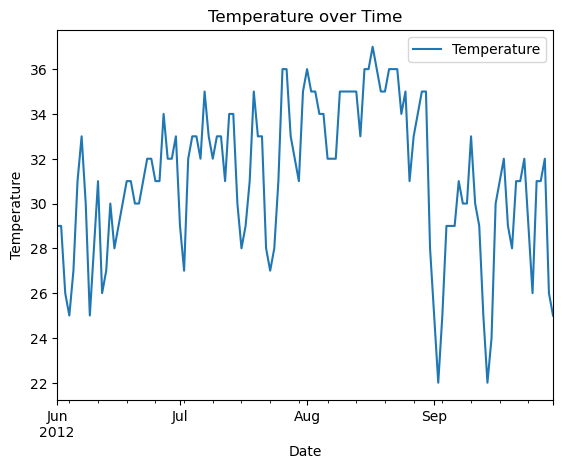

In [179]:
b_df['Date'] = pd.to_datetime(b_df[['year', 'month', 'day']])  # Creating new column for date
b_df.plot.line(x='Date', y='Temperature', title='Temperature over Time', ylabel='Temperature')

## Task 3

<Axes: title={'center': 'Relation between Temperature and FWI'}, xlabel='Temperature', ylabel='FWI'>

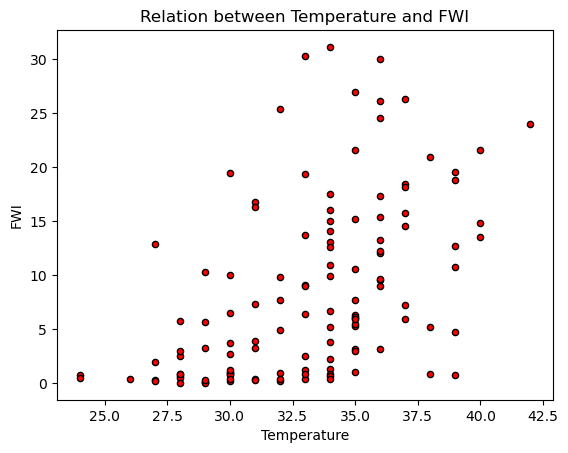

In [178]:
s_df.plot.scatter(x='Temperature', y='FWI', title='Relation between Temperature and FWI',
                  color='red', edgecolor='k')

## Task 4
Using Bar graph approach

Text(0, 0.5, 'Average RH')

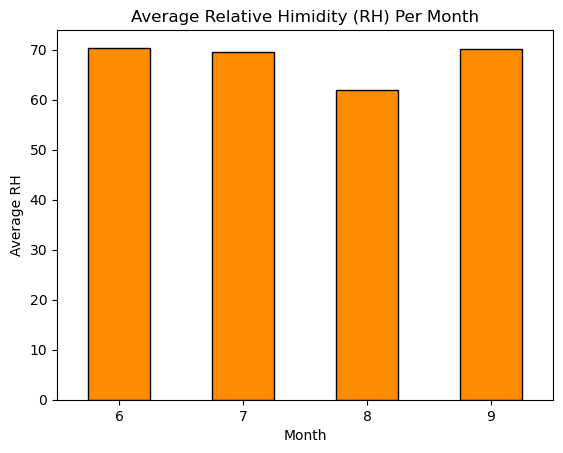

In [167]:
avg_RH_per_month = b_df.groupby('month')['RH'].mean()
avg_RH_per_month.plot(kind='bar', edgecolor='k', facecolor='darkorange')
plt.title('Average Relative Himidity (RH) Per Month')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Average RH')

## Task 5

month
6    13.1
7     1.4
8    16.8
9    10.1
Name: Rain, dtype: float64


Text(0, 0.5, 'Rainfall in One Day')

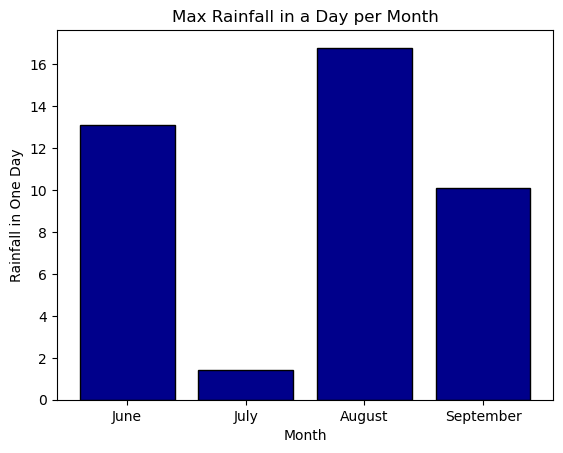

In [168]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
b_df_temp = b_df.copy()  # Explicitly make a temporary copy to change dates into strings (and clear warnings)
b_df_temp['month'] = pd.to_datetime(b_df['month'], format='%m').dt.strftime('%B')  # https://www.geeksforgeeks.org/pandas-series-dt-strftime/
unique_months = b_df_temp['month'].unique()
max_rain_per_month = b_df.groupby(['month'])['Rain'].max()
print(max_rain_per_month)
plt.bar(unique_months, max_rain_per_month, edgecolor='k', color='darkblue', zorder=1)
plt.title('Max Rainfall in a Day per Month')
plt.xlabel('Month')
plt.ylabel('Rainfall in One Day')
#plt.grid(True)

## Task 6

Text(0, 0.5, 'Frequency')

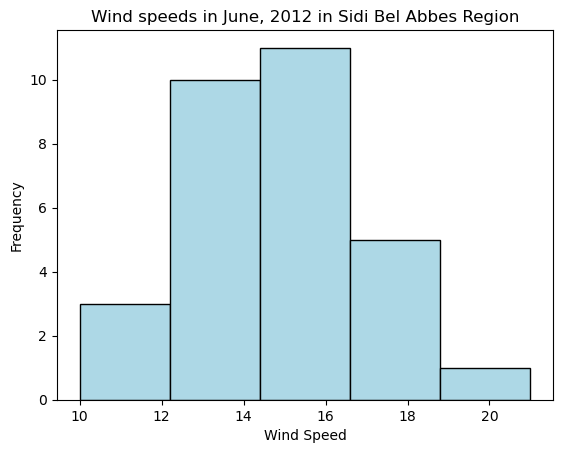

In [169]:
s_df_june_2012 = s_df[(s_df['year'] == 2012) & (s_df['month'] == 6)]  # Detaching June 2012 from df
wind_speeds_june_2012 = s_df_june_2012['Ws']  # Getting just the wind speeds
plt.hist(wind_speeds_june_2012, bins=5, color='lightblue', ec='k')
plt.title('Wind speeds in June, 2012 in Sidi Bel Abbes Region')
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")


## Task 7

Text(0.5, 0, 'Day')

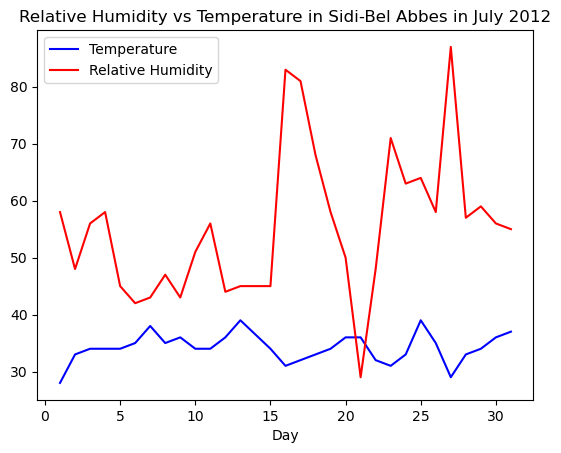

In [176]:
s_df_july_2012 = s_df[(s_df['year'] == 2012) & (s_df['month'] == 7)]
plt.plot(s_df_july_2012['day'], s_df_july_2012['Temperature'], color='blue', label='Temperature')
plt.plot(s_df_july_2012['day'], s_df_july_2012['RH'], color='red', label='Relative Humidity')
plt.legend()  # Display the line names
plt.title("Relative Humidity vs Temperature in Sidi-Bel Abbes in July 2012")
plt.xlabel('Day')

## Task 8

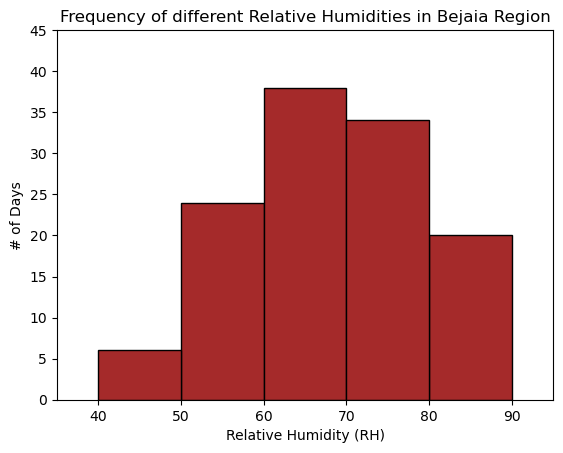

In [171]:
from collections import Counter
b_RH = b_df['RH']  # Isolating th Bejaia Relative Humidities

# Bucket RH by 10
histogram = Counter(rh // 10 * 10 for rh in b_RH)

plt.bar([x + 5 for x in histogram.keys()], histogram.values(), 10, color='brown', edgecolor='k')

plt.axis([35, 95, 0, 45])

plt.title('Frequency of different Relative Humidities in Bejaia Region')
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("# of Days")
plt.show()

## Task 9

Using heatmaps to show the average temperature for each month when 
there is "no fire" and there is "fire" for the "Bejaia Region Dataset"

     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI      Classes       Date  
0    0.5  not fi

ValueError: x and y must have same first dimension, but have shapes (15,) and (4,)

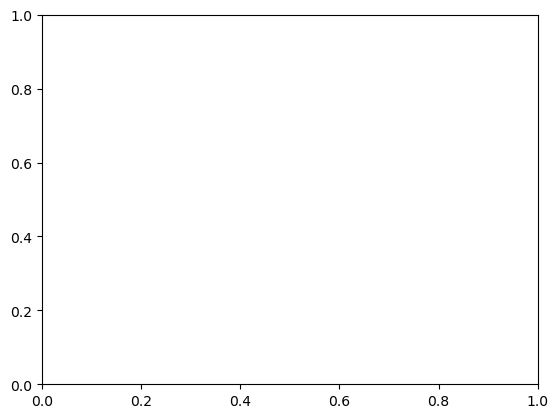

In [173]:
import seaborn as sns

# Getting the average temperatures of 
b_df_fire = b_df[(b_df['Classes'] == 'fire')]
avg_RH_per_month = b_df.groupby('month')['RH'].mean()

b_df_no_fire = b_df[(b_df['Classes'] == 'fire')]

# Plot the 'fire' and 'no fire' lines 
plt.plot(xs_fire, b_df__fire['Temperature'], 'g-',  label='variance')   
plt.plot(xs_no_fire, b_df__no_fire['Temperature'], 'r-.', label='bias^2')       

#plt.legend(loc=9)
plt.xlabel("")
plt.ylabel("Temperature")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()
